### Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from sklearn.preprocessing import LabelEncoder

### Global kmeans methods

In [2]:
from global_kmeans_pp.global_clustering import GlobalKMeans, GlobalKMeansPP

### Synthetic Datasets

In [3]:
def get_artificial2D(path, skiprows):
    full_path = "./Artificial/" + path
    df = pd.read_csv(full_path, skiprows=skiprows, names=['x', 'y', 'class'])
    labels = df["class"].to_numpy()
    label_enc = LabelEncoder()
    labels = label_enc.fit_transform(labels)
    df.drop(columns=["class"], inplace=True)
    data = df.to_numpy()
    
    return data, labels

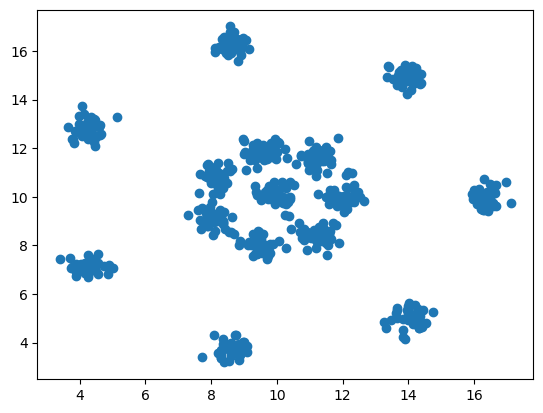

In [4]:
data_details = {
    0:("2d-4c-no4.arff", 10),
    1:("2d-10c.arff", 7),
    2:("aggregation.arff", 12),
    3:("D31.arff", 11),
    4:("impossible.arff", 10),
    5:("R15.arff", 10),
    6:("twenty.arff", 8),
}

# Select synthetic data set
data_id = 5
path, skiprows = data_details[data_id]
X, y = get_artificial2D(path, skiprows)

plt.scatter(X[:,0], X[:,1])
plt.show()

### Plot $k$-th clustering solution

In [22]:
color_list = list(mcolors.CSS4_COLORS.keys()) + list(mcolors.XKCD_COLORS.keys())
np.random.shuffle(color_list)
color_list = ['royalblue', 'gold', 'deepskyblue', 'hotpink', 'mediumorchid', 'crimson', 'salmon', 'limegreen'] + color_list

def plot_solution(X, centroids, kmeans_labels, kmeans_centers):
    # Figure
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.title('{}-means solution'.format(centroids), fontsize=15)
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2.0)
    
    # Data scatters
    ax.scatter(X[:,0], X[:,1], edgecolors='none', c=[color_list[kmeans_labels[i]] for i in range(kmeans_labels.shape[0])],  s=20)
    ax.scatter(kmeans_centers[:,0], kmeans_centers[:,1], c='r', marker='*', s=500, edgecolors='black')

    # Legend
    leg_data = Line2D([0], [0], marker='o', color='w', markerfacecolor='black', label='Datapoint', markeredgecolor='black', markersize=10)
    leg_centers = Line2D([0], [0], marker='*', color='w', markerfacecolor='r', label='Center', markeredgecolor='black', markersize=20)
    legend = ax.legend(handles=[leg_data, leg_centers],loc='upper left', fontsize=15)
    
    #legend = ax.legend(['Data', 'Centers', 'Candidates'], loc='upper right', fontsize=13)
    legend.get_frame().set_linewidth(2.0)
    legend.get_frame().set_edgecolor('black')
    legend.legendHandles[0].set_color('w')
    
    # Axes
    #ax.xlim([-0.2, 1.2])
    #ax.ylim([-0.2, 1.2])
    plt.xticks([])
    plt.yticks([]) 
    
    # plt.show()
    plt.tight_layout()
    plt.show()
    plt.close()

### Global $k$-means++ example

In [37]:
# Select number of clusters K
n_clusters = 15

# Select number of candidates L 
n_candidates = 25

method = {0: 'batch', 1: 'sequential'}

# option=0 selects the k-means++ with batch sampling
# option=1 selects the k-means++ with sequential sampling
option = 0

# Same as in sklearn k-means method
verbose = 1

global_kmeans_pp = GlobalKMeansPP(n_clusters=n_clusters, n_candidates=n_candidates, sampling=method[option], verbose=verbose)
global_kmeans_pp.fit(X)
labels_at_K = global_kmeans_pp.predict(X) # provides only the final solution

clusters = global_kmeans_pp.labels_ # provides a dict with all clustering solution
centroids = global_kmeans_pp.cluster_centers_ # provides a dict with all center centroids

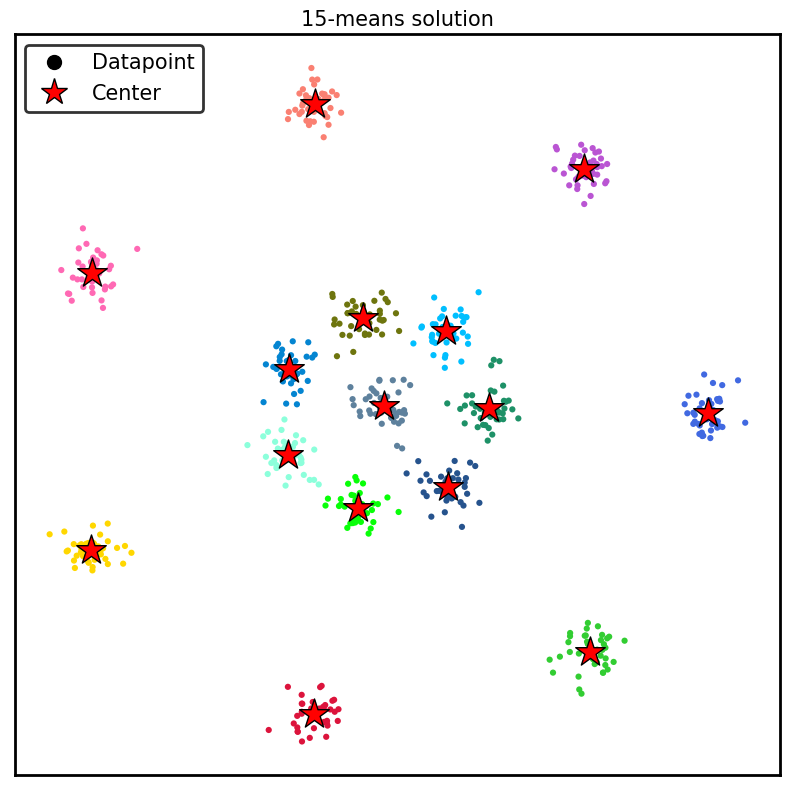

In [34]:
# Select k to plot solution which clustering solution you want to visualize
k = 15
plot_solution(X, "{:d}".format(k), clusters[k], centroids[k])

### Global $k$-means example

In [38]:
# Select number of clusters K
n_clusters = 15

# Same as in sklearn k-means method
verbose = 1

global_kmeans = GlobalKMeans(n_clusters=n_clusters, verbose=verbose)
global_kmeans.fit(X)
labels_at_K = global_kmeans.predict(X)

clusters = global_kmeans.labels_ # provides a dict with all clustering solution
centroids = global_kmeans.cluster_centers_ # provides a dict with all center centroids

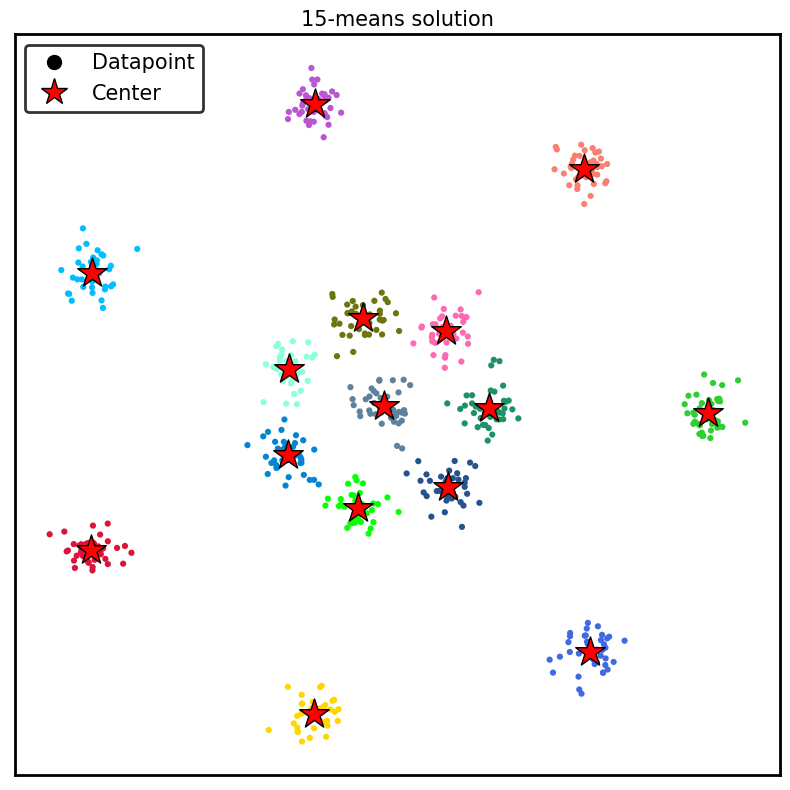

In [36]:
# Select k to plot solution which clustering solution you want to visualize
k = 15
plot_solution(X, "{:d}".format(k), clusters[k], centroids[k])